In [10]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [3]:
# Load your data
df = pd.read_excel("dailykos.xlsx")  # Adjust the file path as per your data location

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Columns: 1546 entries, Document to zone
dtypes: int64(1546)
memory usage: 40.5 MB


In [5]:
df.describe()

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,...,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,1715.500000,0.020408,0.034694,0.032362,0.035277,0.018659,0.024781,0.053061,0.050146,0.054810,...,0.031778,0.467055,0.081633,0.092711,0.021866,0.042274,0.067055,0.033528,0.118950,0.017784
std,990.300039,0.157046,0.250326,0.185040,0.385177,0.145713,0.155481,0.498567,0.443801,0.289656,...,0.191338,0.990738,0.321824,0.426765,0.226142,0.263935,0.310494,0.201442,0.523985,0.165495
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,858.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1715.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2572.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3430.000000,2.000000,6.000000,2.000000,10.000000,3.000000,1.000000,14.000000,14.000000,6.000000,...,4.000000,10.000000,4.000000,14.000000,8.000000,5.000000,3.000000,3.000000,10.000000,4.000000



#### The reason for dropping the 'Document' column is that it likely contains identifiers or labels that are not relevant for clustering.

In [6]:
# Extract the feature columns from your DataFrame
df = df.drop('Document', axis=1)
data = df
df.shape

(3430, 1545)

## סעיף ב .1

In [5]:
def analyze_clusters(data, clustering_values):
    results = []  # Initialize an empty list to store the results

    # Loop over each value of 'n_clusters' in the 'clustering_values' list
    for n_clusters in clustering_values:
        # Create a KMeans clustering model with the current number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        
        # Fit the model to the data and obtain cluster labels
        cluster_labels = kmeans.fit_predict(data)

        # Calculate the average silhouette score for the clustering
        silhouette_avg = silhouette_score(data, cluster_labels)

        # Compute the silhouette score for each individual sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        # Obtain the sum of squared distances of samples to their closest cluster center
        sse = kmeans.inertia_

        # Append a dictionary with cluster information to the 'results' list
        results.append({
            'Cluster': n_clusters,  # Number of clusters
            'SSE': sse,  # Sum of squared errors (inertia)
            'Silhouette': silhouette_avg,  # Average silhouette score
        })

    # Convert the list of dictionaries to a pandas DataFrame and return it
    return pd.DataFrame(results)

# Example usage:
clustering_values = [2, 4, 6, 8]  # Example clustering values
results_df = analyze_clusters(data, clustering_values)
(results_df)

,Cluster,SSE,Silhouette
0,2,817799.896869,0.251754
1,4,765550.894763,0.205318
2,6,738039.144061,0.181977
3,8,722874.901422,0.140831


## Elbow Method for kmeans

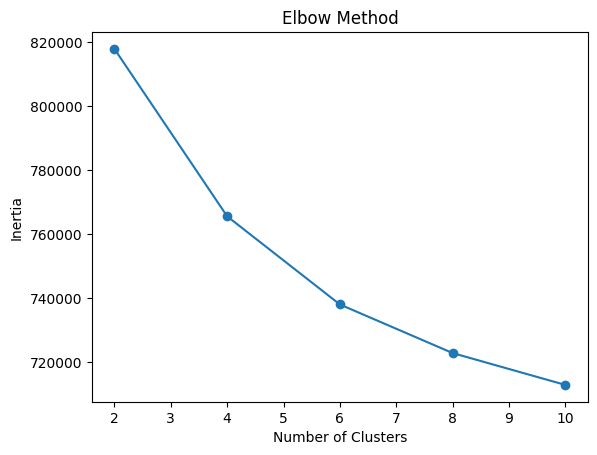

In [6]:
clustering_values = [2, 4, 6, 8,10]
inertia_values = []

for n_clusters in clustering_values:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10 ).fit(data)
    
    inertia_values.append(kmeans.inertia_)

plt.plot(clustering_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Elbow Method for Optimal k for kmeans

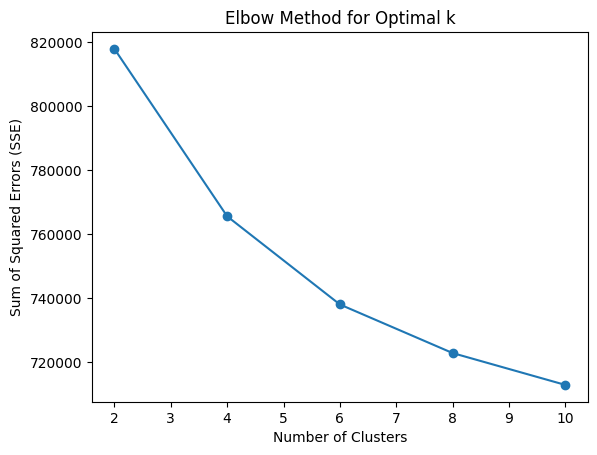

In [7]:
def analyze_clusters(data, clustering_values):
    results = []

    for n_clusters in clustering_values:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init= 10)
        cluster_labels = kmeans.fit_predict(data)
        
        sse = kmeans.inertia_

        results.append({
            'Cluster': n_clusters,
            'SSE': sse,
        })

    return pd.DataFrame(results)

# Example usage:
#data = df.drop('Document', axis=1)  # Extracting feature columns
clustering_values = [2, 4, 6, 8,10]  # Example clustering values
results_df = analyze_clusters(data, clustering_values)

# Plotting the SSE values
plt.plot(results_df['Cluster'], results_df['SSE'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

## Silhouette Plot for kmeans

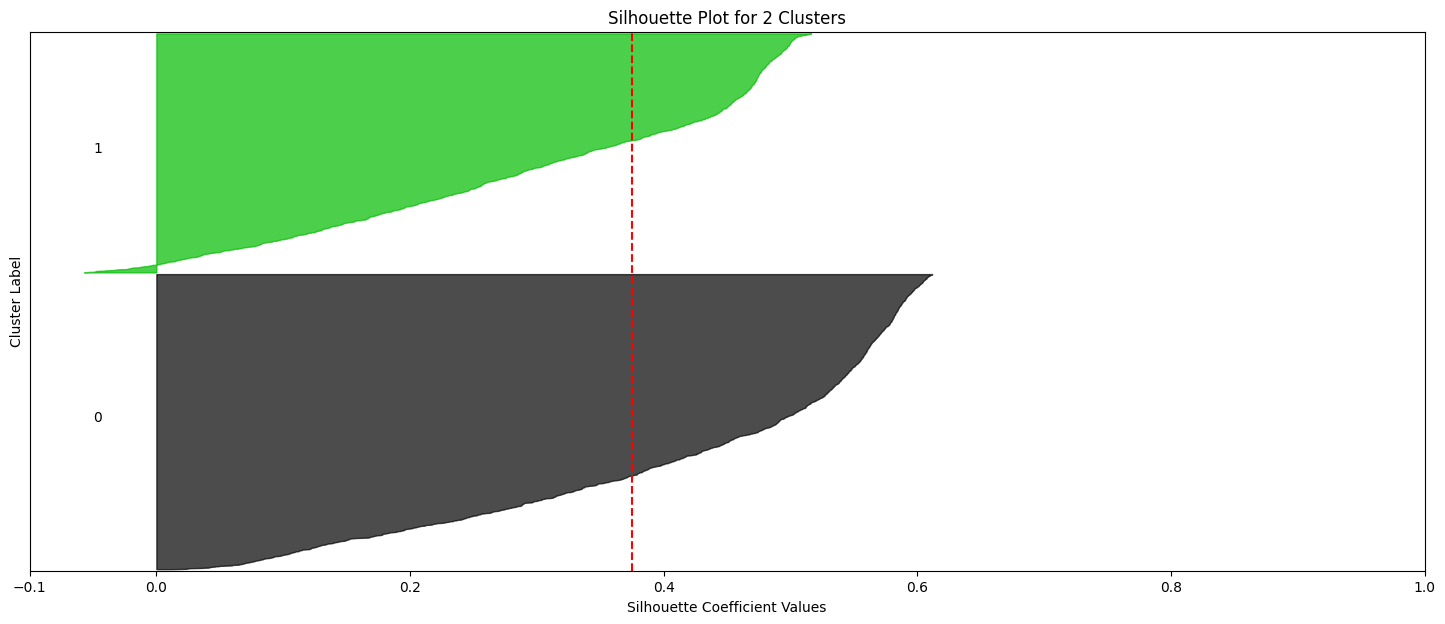

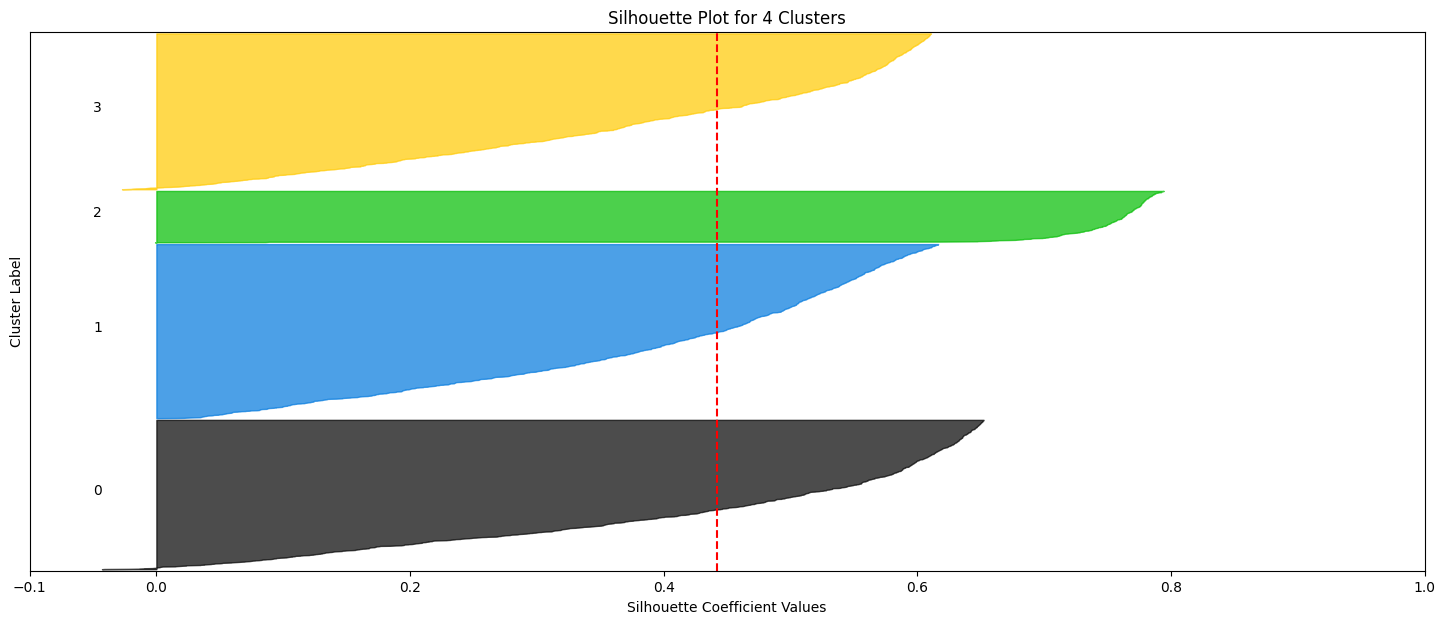

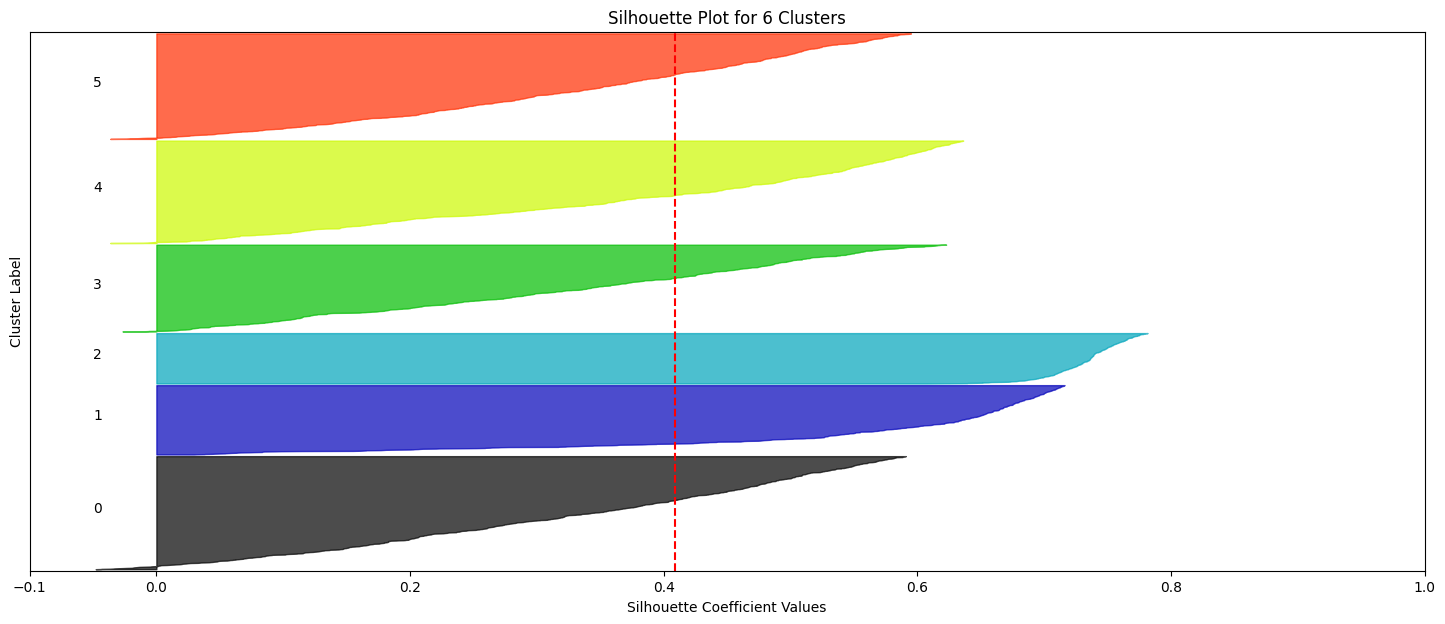

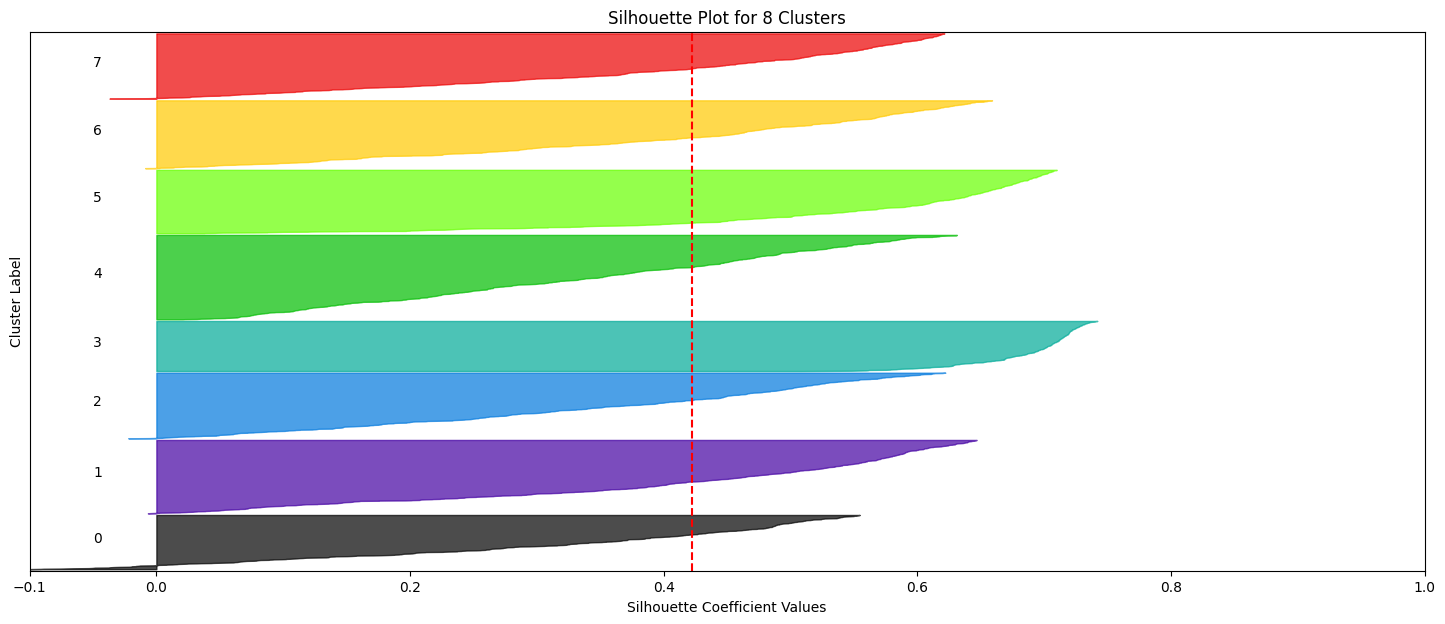

In [8]:
# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data)

# Perform clustering and silhouette analysis
def analyze_clusters(data, clustering_values):
    results = []

    for n_clusters in clustering_values:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
        cluster_labels = kmeans.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        results.append({
            'Cluster': n_clusters,
            'Silhouette': silhouette_avg,
            'Sample Silhouette Values': sample_silhouette_values,
            'Cluster Labels': cluster_labels
        })

    return results

# Example usage:
clustering_values = [2, 4, 6, 8]  # Example clustering values
results = analyze_clusters(X_tsne, clustering_values)

# Plot silhouette analysis
for result in results:
    n_clusters = result['Cluster']
    silhouette_avg = result['Silhouette']
    sample_silhouette_values = result['Sample Silhouette Values']
    cluster_labels = result['Cluster Labels']

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_title("Silhouette Plot for {} Clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")

plt.show()

## Scaled Inertia for kmeans

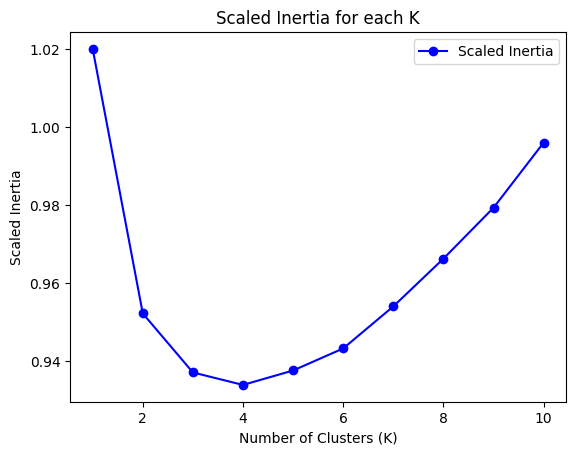

In [9]:
def calculate_scaled_inertia(scaled_data, k, alpha_k=0.02):
    # Compute the inertia for k clusters
    kmeans = KMeans(n_clusters=k, random_state=0,n_init = 10).fit(scaled_data)
    inertia = kmeans.inertia_

    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0,n_init = 10).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    
    return scaled_inertia

# Example usage:
#scaled_data = np.asarray(data).astype(float)
scaled_data = data.to_numpy()

clustering_values = range(1, 11)  # Example range of clustering values (K)

scaled_inertia_values = []
for k in clustering_values:
    scaled_inertia = calculate_scaled_inertia(scaled_data, k)
    scaled_inertia_values.append(scaled_inertia)

# Plot the results
plt.plot(clustering_values, scaled_inertia_values, marker='o', linestyle='-', color='b', label='Scaled Inertia')
plt.title('Scaled Inertia for each K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Scaled Inertia')
plt.legend()
plt.show()

## סעיף ג.1

#### In summary, after conducting a comprehensive analysis using various methodologies, including the Elbow Method, Silhouette Score, Elbow Method for Optimal k, and Scaled Inertia analysis, it is recommended to proceed with 4 clusters for the K-means clustering algorithm on the given dataset.

## סעיף ד.1

In [11]:
def min_max_cluster_sizes(data, clustering_values):
    min_sizes = []  # List to store the minimum cluster sizes
    max_sizes = []  # List to store the maximum cluster sizes

    # Loop over each value of 'n_clusters' in the 'clustering_values' list
    for n_clusters in clustering_values:
        # Create a KMeans clustering model with the current number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init = 10)
        
        # Fit the model to the data and obtain cluster labels
        cluster_labels = kmeans.fit_predict(data)

        # Calculate the sizes of each cluster
        cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
        
        # Compute the minimum and maximum cluster sizes
        min_size = np.min(cluster_sizes)
        max_size = np.max(cluster_sizes)

        # Append the minimum and maximum cluster sizes to their respective lists
        min_sizes.append(min_size)
        max_sizes.append(max_size)

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({'Clustering Values': clustering_values,
                               'Minimum Cluster Size': min_sizes,
                               'Maximum Cluster Size': max_sizes})

    # Return the DataFrame containing the results
    return results_df ,cluster_labels

# Example usage:
clustering_values = [2, 4, 6, 8]  # Example clustering values
min_max_sizes ,cluster_labels = min_max_cluster_sizes(data, clustering_values)
(min_max_sizes)

,Clustering Values,Minimum Cluster Size,Maximum Cluster Size
0,2,338,3092
1,4,298,2321
2,6,155,2076
3,8,41,1809


## סעיף ה.1

In [12]:
def cluster_and_top_words(data, K=4, num_words=25):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(data)

    # Create a new DataFrame with the original data and cluster labels
    clustered_data = data.copy()
    clustered_data['Cluster'] = kmeans.labels_

    # Initialize a dictionary to store the top words for each cluster
    top_words_dict = {}

    # Iterate over each cluster
    for i in range(K):
        # Filter the data for the current cluster
        cluster_data = clustered_data[clustered_data['Cluster'] == i]

        # Sum up the word counts across all documents in the cluster
        cluster_word_counts = cluster_data.drop(columns=['Cluster']).sum()

        # Get the top N words and their counts
        top_words = cluster_word_counts.nlargest(num_words)

        # Store the top words in the dictionary
        top_words_dict[f'Cluster {i+1}'] = list(zip(top_words.index, top_words.values))

    # Create a DataFrame from the dictionary
    result_df = pd.DataFrame(top_words_dict)

    return result_df

cluster_and_top_words(data, K=4, num_words=25)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,"(democrat, 1525)","(bush, 3766)","(november, 3432)","(bush, 2758)"
1,"(dean, 1206)","(kerry, 1855)","(poll, 1611)","(kerry, 1804)"
2,"(kerry, 844)","(presided, 904)","(vote, 1473)","(democrat, 1801)"
3,"(state, 778)","(poll, 864)","(challenge, 1366)","(poll, 1740)"
4,"(republican, 733)","(iraq, 802)","(bush, 1022)","(republican, 1423)"
5,"(candidate, 693)","(administration, 645)","(democrat, 958)","(elect, 1377)"
6,"(parties, 691)","(state, 626)","(republican, 919)","(state, 1371)"
7,"(campaign, 664)","(war, 596)","(house, 829)","(iraq, 1301)"
8,"(poll, 603)","(democrat, 569)","(kerry, 790)","(war, 1285)"
9,"(race, 526)","(time, 561)","(senate, 781)","(time, 1224)"


In [54]:
# Load the data
df = pd.read_excel("dailykos.xlsx")
# Drop the 'Document' column if it's not needed
data = df.drop('Document', axis=1)

## סעיף ב.2

In [56]:
def analyze_dbscan(data, min_samples_values, eps):
    results = []

    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data)
        
        # Calculating number of clusters, ignoring noise if present (-1 label)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        
        # Number of noise points
        n_noise = list(cluster_labels).count(-1)
        
        results.append({
            'Min Samples': min_samples,
            'Number of Clusters': n_clusters,
            'Number of Noise Points': n_noise
        })

    return pd.DataFrame(results) , cluster_labels

# Example usage:

min_samples_values = [1,2,5] # Example values for min_samples
eps = 18 # Example value for eps
results_df , cluster_labels = analyze_dbscan(data, min_samples_values, eps)
results_df

,Min Samples,Number of Clusters,Number of Noise Points
0,1,562,0
1,2,6,556
2,5,1,567


## סעיף ג.2

I  choose   min_samples = 2 and 6 clusters.
While it generates a significant number of noise points,
the number of clusters is more reasonable compared to the other options

In [57]:
eps = 18
min_samples_values = [2]
results_df , cluster_labels = analyze_dbscan(data, min_samples_values, eps)
unique_labels = np.unique(cluster_labels)
print(unique_labels)
cluster_labels

[-1  0  1  2  3  4  5]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
def analyze_clusters_dbscan(data, eps_values, min_samples_values):
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(data)

            # Check if there's only one label (-1, noise) or all labels are the same
            if len(np.unique(cluster_labels)) <= 1:
                continue  # Skip this combination of parameters

            # Calculate silhouette score
            silhouette_avg = silhouette_score(data, cluster_labels)

            results.append({
                'Eps': eps,
                'Min Samples': min_samples,
                'Silhouette Score': silhouette_avg
            })

    return pd.DataFrame(results)

# Example usage:
eps_values = [0.1, 0.5, 1]
min_samples_values = [2, 4, 6]

results_df_dbscan = analyze_clusters_dbscan(data, eps_values, min_samples_values)
results_df_dbscan

# Example usage:

# Define the values of 'eps' and 'min_samples' to analyze
eps_values = [18]
min_samples_values = [1, 2, 5]

# Call the 'analyze_clusters_dbscan' function with the dataset and parameters
results_df_dbscan = analyze_clusters_dbscan(data, eps_values, min_samples_values)
results_df_dbscan

,Eps,Min Samples,Silhouette Score
0,18,1,0.105844
1,18,2,0.165456
2,18,5,0.307665


## Scaled Inertia for DBSCAN

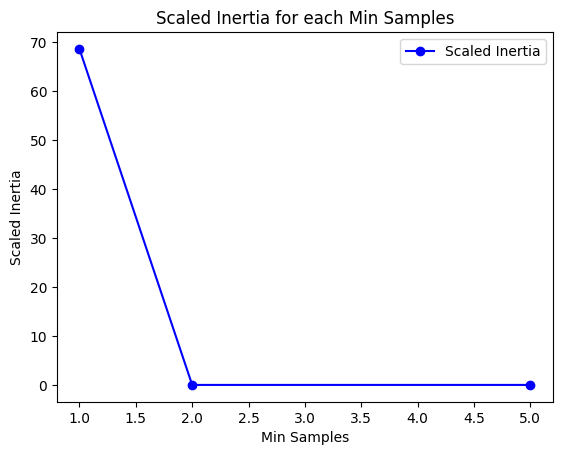

In [59]:
def calculate_scaled_inertia(scaled_data, min_samples, alpha_k=0.02):
    # Fit DBSCAN with the specified min_samples
    dbscan = DBSCAN(min_samples=min_samples).fit(scaled_data)
    labels = dbscan.labels_
    
    # Compute the inertia
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    scaled_inertia = len(set(labels)) / inertia_o + alpha_k * len(set(labels))
    
    return scaled_inertia

# Example usage:
min_samples_values = [1,2,5]  # Example range of min_samples values
scaled_data = data.to_numpy()
scaled_inertia_values = []
for min_samples in min_samples_values:
    scaled_inertia = calculate_scaled_inertia(scaled_data, min_samples)
    scaled_inertia_values.append(scaled_inertia)

# Plot the results
plt.plot(min_samples_values, scaled_inertia_values, marker='o', linestyle='-', color='b', label='Scaled Inertia')
plt.title('Scaled Inertia for each Min Samples')
plt.xlabel('Min Samples')
plt.ylabel('Scaled Inertia')
plt.legend()
plt.show()

## סעיף ד.2

In [60]:
# Assuming 'cluster_labels' contains the cluster labels assigned to each data point

def find_max_min_cluster_samples(cluster_labels):
    cluster_counts = pd.Series(cluster_labels).value_counts()
    max_cluster_label = cluster_counts.idxmax()
    min_cluster_label = cluster_counts.idxmin()
    max_cluster_samples = cluster_counts[max_cluster_label]
    min_cluster_samples = cluster_counts[min_cluster_label]
    return max_cluster_label, max_cluster_samples, min_cluster_label, min_cluster_samples

# Example usage:
max_cluster_label, max_cluster_samples, min_cluster_label, min_cluster_samples = find_max_min_cluster_samples(cluster_labels)
print(f"Cluster label {max_cluster_label} has the maximum number of samples: {max_cluster_samples}")
print(f"Cluster label {min_cluster_label} has the minimum number of samples: {min_cluster_samples}")

Cluster label 0 has the maximum number of samples: 2864
Cluster label 1 has the minimum number of samples: 2


In [62]:
def find_cluster_samples(cluster_labels):
    cluster_counts = pd.Series(cluster_labels).value_counts()
    return pd.DataFrame({'Cluster': cluster_counts.index, 'Sample Count': cluster_counts.values})

# Example usage:
cluster_counts_df = find_cluster_samples(cluster_labels)
print("Cluster samples counts:")
cluster_counts_df

Cluster samples counts:


,Cluster,Sample Count
0,0,2864
1,-1,556
2,1,2
3,2,2
4,3,2
5,4,2
6,5,2


## סעיף ה.2

In [34]:
def cluster_and_top_words_dbscan(data, eps=0.5, min_samples=5, num_words=10):
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)

    # Create a new DataFrame with the original data and cluster labels
    clustered_data = data.copy()
    clustered_data['Cluster'] = dbscan.labels_

    # Remove noise points (points labeled as -1)
    clustered_data = clustered_data[clustered_data['Cluster'] != -1]

    # Initialize a dictionary to store the top words for each cluster
    top_words_dict = {}

    # Get the unique cluster labels
    unique_clusters = clustered_data['Cluster'].unique()

    # Iterate over each cluster
    for cluster_label in unique_clusters:
        # Filter the data for the current cluster
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster_label]

        # Sum up the word counts across all documents in the cluster
        cluster_word_counts = cluster_data.drop(columns=['Cluster']).sum()

        # Get the top N words and their counts
        top_words = cluster_word_counts.nlargest(num_words)

        # Store the top words in the dictionary
        top_words_dict[f'Cluster {cluster_label + 1}'] = list(zip(top_words.index, top_words.values))

    # Create a DataFrame from the dictionary
    result_df = pd.DataFrame(top_words_dict)

    return result_df

# Example usage
cluster_and_top_words_dbscan(data, eps=18, min_samples=2, num_words=25)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,"(bush, 5349)","(parties, 36)","(kerry, 23)","(million, 23)","(bush, 19)","(iraq, 20)"
1,"(kerry, 3973)","(democrat, 14)","(record, 20)","(kerry, 19)","(cost, 13)","(war, 18)"
2,"(poll, 3795)","(local, 10)","(military, 10)","(raise, 19)","(administration, 11)","(bush, 10)"
3,"(november, 3074)","(counties, 9)","(release, 8)","(democrat, 17)","(lie, 10)","(firm, 10)"
4,"(democrat, 3052)","(takes, 8)","(bush, 7)","(bush, 16)","(house, 9)","(friend, 10)"
5,"(republican, 2386)","(state, 7)","(campaign, 6)","(republican, 12)","(billion, 8)","(bin, 8)"
6,"(vote, 2233)","(candidate, 6)","(republican, 5)","(money, 11)","(white, 8)","(die, 8)"
7,"(elect, 2038)","(people, 6)","(service, 5)","(campaign, 8)","(bill, 6)","(laden, 8)"
8,"(general, 1852)","(position, 6)","(committee, 4)","(fundraise, 7)","(iraq, 6)","(congress, 6)"
9,"(house, 1828)","(running, 6)","(gop, 4)","(total, 7)","(budget, 4)","(future, 6)"


## סעיף ו

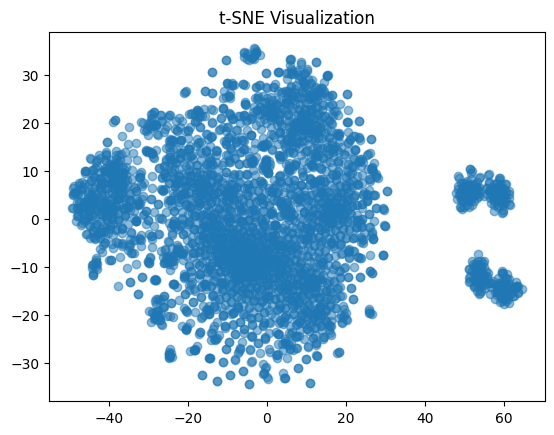

In [70]:
# Assuming tsne_data is your two-dimensional t-SNE transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data)

# Plotting the scatter plot
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.show()

## סעיף ז

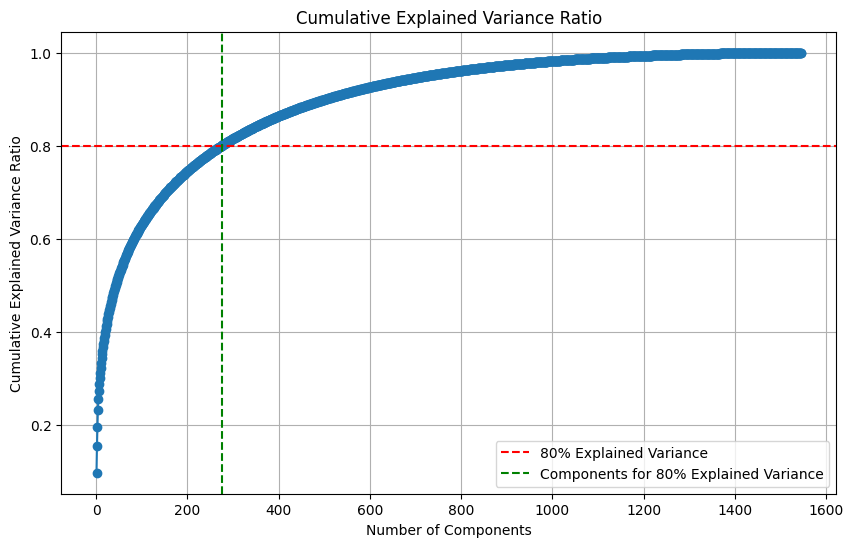

Number of components required to reach 80% explained variance: 275


In [21]:
# Initialize PCA with no. of components set to None
pca = PCA(n_components=None)

# Fit PCA to the data
pca.fit(data)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the no. of components required to reach 80% explained variance
n_components_80_percent = np.argmax(cumulative_explained_variance_ratio >= 0.8) + 1

# Reinitialize PCA with the determined no. of components
pca = PCA(n_components=n_components_80_percent)

# Fit PCA again to transform the data with the selected no. of components
data_transformed = pca.fit_transform(data)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.axvline(x=n_components_80_percent, color='g', linestyle='--', label='Components for 80% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print(f'Number of components required to reach 80% explained variance: {n_components_80_percent}')

In [22]:
# Total number of original features
total_features = data.shape[1]

# Number of components required to reach 80% explained variance
n_components_80_percent = np.argmax(cumulative_explained_variance_ratio >= 0.8) + 1

# Number of components dropped
components_dropped = total_features - n_components_80_percent

print(f'Number of components dropped during PCA: {components_dropped}')
n_components_80_percent
total_features

Number of components dropped during PCA: 1270


1545

In [23]:
# Reinitialize PCA with the determined no. of components
pca = PCA(n_components=n_components_80_percent)

# Fit PCA again to transform the data with the selected no. of components
data_transformed = pca.fit_transform(data)

In [69]:
data

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data_transformed = pd.DataFrame(data_transformed)
data_transformed 

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,-0.680498,1.093079,-1.783941,0.115340,0.529821,2.896441,2.084851,0.968850,0.461511,0.572897,...,0.225610,0.520588,-0.309019,-0.530163,-0.257420,0.143306,0.646571,-0.065017,0.469517,-0.157072
1,-2.507712,0.571606,-0.582923,-4.126820,0.162047,0.313507,4.985344,0.311794,-0.176095,-0.825381,...,-0.605860,0.027541,0.076651,0.290377,0.351536,0.383090,0.144340,0.838641,-0.309848,-0.276143
2,12.746635,-5.538403,-3.423072,-1.229663,-0.741466,-0.518924,1.314264,-2.322605,-0.269793,2.523918,...,-0.143734,-0.106692,-0.100294,-0.113267,-0.012488,0.014726,-0.027279,0.200592,-0.044792,-0.117622
3,-2.691393,-1.624464,0.233585,1.406075,0.219278,-0.597419,0.086045,-1.448410,-1.247533,-4.473057,...,-0.356039,1.061621,0.137063,0.342185,0.662539,-0.183944,-0.276099,0.244846,-0.309568,0.518977
4,1.699824,10.360307,-2.743075,-2.371096,-2.897381,-0.213029,-1.039696,-0.033284,-0.169545,-1.161978,...,-0.286025,-0.845432,0.017992,0.084381,0.342958,-0.632353,-0.458242,0.308979,-0.070491,-0.328700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,1.394343,2.477964,-0.829572,-4.252391,-2.295050,3.780879,-1.556715,-2.424554,1.494287,0.097991,...,-0.396241,0.144933,-0.426417,-0.095028,0.345783,0.024575,0.237629,0.060921,0.122258,0.106848
3426,-2.644729,-0.895729,-1.497717,-1.313820,-1.477213,-0.057582,-0.024949,-1.171263,0.317186,1.231693,...,-0.117026,-0.051337,0.068681,-0.089026,0.162306,0.196122,0.048675,0.094487,0.072097,0.116838
3427,-2.150860,1.148500,-2.823820,-0.142743,-1.470044,-1.596592,-2.017052,-0.012347,0.258914,0.275101,...,0.469022,-0.181386,0.195637,-0.085338,0.594906,-0.004439,0.120499,0.045918,0.050740,0.132382
3428,-2.313739,-0.529056,-0.813233,0.347606,-1.816844,-0.165154,-1.226921,1.092167,-1.500998,0.249390,...,0.191782,-0.078769,-0.137629,0.243635,0.169731,0.015462,0.262593,-0.010941,0.232255,0.127396


In [29]:
def analyze_dbscan(data, min_samples_values, eps):
    results = []

    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data)
        
        # Calculating number of clusters, ignoring noise if present (-1 label)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        
        # Number of noise points
        n_noise = list(cluster_labels).count(-1)
        
        results.append({
            'Min Samples': min_samples,
            'Number of Clusters': n_clusters,
            'Number of Noise Points': n_noise
        })

    results_df = pd.DataFrame(results)

    return results_df, cluster_labels

# Example usage:

min_samples_values = [1, 2, 5] # Example values for min_samples
eps = 18 # Example value for eps
results_df, cluster_labels = analyze_dbscan(data_transformed, min_samples_values, eps)
results_df

,Min Samples,Number of Clusters,Number of Noise Points
0,1,282,0
1,2,3,279
2,5,1,285


In [30]:
eps = 18
min_samples_values = [2]
results_df , cluster_labels = analyze_dbscan(data_transformed, min_samples_values, eps)
unique_labels = np.unique(cluster_labels)
print(unique_labels)
cluster_labels

[-1  0  1  2]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
def find_max_min_cluster_samples(cluster_labels):
    cluster_counts = pd.Series(cluster_labels).value_counts()
    max_cluster_label = cluster_counts.idxmax()
    min_cluster_label = cluster_counts.idxmin()
    max_cluster_samples = cluster_counts[max_cluster_label]
    min_cluster_samples = cluster_counts[min_cluster_label]
    return max_cluster_label, max_cluster_samples, min_cluster_label, min_cluster_samples

# Example usage:
max_cluster_label, max_cluster_samples, min_cluster_label, min_cluster_samples = find_max_min_cluster_samples(cluster_labels)
print(f"Cluster label {max_cluster_label} has the maximum number of samples: {max_cluster_samples}")
print(f"Cluster label {min_cluster_label} has the minimum number of samples: {min_cluster_samples}")

Cluster label 0 has the maximum number of samples: 3147
Cluster label 1 has the minimum number of samples: 2


In [32]:
eps = 18
min_samples_values = [2]
results_df , cluster_labels = analyze_dbscan(data_transformed, min_samples_values, eps)
unique_labels = np.unique(cluster_labels)
print(unique_labels)
cluster_labels
def find_cluster_samples(cluster_labels):
    cluster_counts = pd.Series(cluster_labels).value_counts()
    return cluster_counts

# Example usage:
cluster_counts = find_cluster_samples(cluster_labels)
print("Cluster samples counts:")
print(cluster_counts)

[-1  0  1  2]
Cluster samples counts:
 0    3147
-1     279
 1       2
 2       2
Name: count, dtype: int64


In [67]:
def analyze_clusters_dbscan(data, eps_values, min_samples_values):
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(data)

            # Check if there's only one label (-1, noise) or all labels are the same
            if len(np.unique(cluster_labels)) <= 1:
                continue  # Skip this combination of parameters

            # Calculate silhouette score
            silhouette_avg = silhouette_score(data, cluster_labels)

            results.append({
                'Eps': eps,
                'Min Samples': min_samples,
                'Silhouette Score': silhouette_avg
            })

    return pd.DataFrame(results)

# Example usage:
eps_values = [0.1, 0.5, 1]
min_samples_values = [2, 4, 6]

results_df_dbscan = analyze_clusters_dbscan(data, eps_values, min_samples_values)
results_df_dbscan

# Example usage:

# Define the values of 'eps' and 'min_samples' to analyze
eps_values = [18]
min_samples_values = [1, 2, 5]

# Call the 'analyze_clusters_dbscan' function with the dataset and parameters
results_df_dbscan = analyze_clusters_dbscan(data_transformed, eps_values, min_samples_values)
results_df_dbscan

,Eps,Min Samples,Silhouette Score
0,18,1,0.205996
1,18,2,0.327166
2,18,5,0.431905


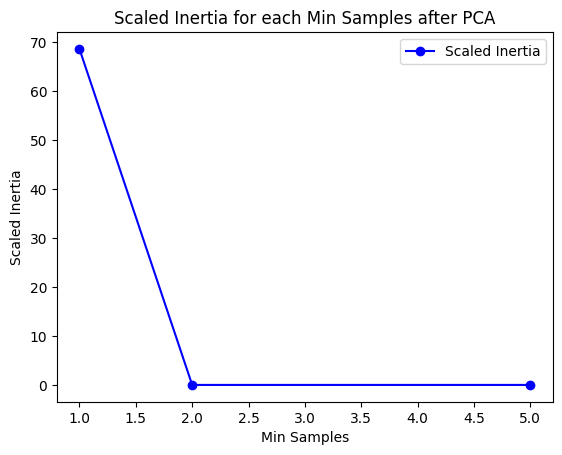

In [66]:
def calculate_scaled_inertia(scaled_data, min_samples, alpha_k=0.02):
    # Fit DBSCAN with the specified min_samples
    dbscan = DBSCAN(min_samples=min_samples).fit(scaled_data)
    labels = dbscan.labels_
    
    # Compute the inertia
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    scaled_inertia = len(set(labels)) / inertia_o + alpha_k * len(set(labels))
    
    return scaled_inertia

# Example usage:
min_samples_values = [1,2,5]  # Example range of min_samples values
scaled_data = data_transformed.to_numpy()
scaled_inertia_values = []
for min_samples in min_samples_values:
    scaled_inertia = calculate_scaled_inertia(scaled_data, min_samples)
    scaled_inertia_values.append(scaled_inertia)

# Plot the results
plt.plot(min_samples_values, scaled_inertia_values, marker='o', linestyle='-', color='b', label='Scaled Inertia')
plt.title('Scaled Inertia for each Min Samples after PCA')
plt.xlabel('Min Samples')
plt.ylabel('Scaled Inertia')
plt.legend()
plt.show()

#### The application of PCA resulted in a reduction in the number of components by 1270, suggesting that redundant or less informative features were eliminated while retaining essential information.


####  Additionally, the clustering analysis showed that PCA contributed to better data separation, as indicated by changes in cluster sizes and improved Silhouette Scores. 


#### Overall, PCA enhanced the clustering quality by providing a more accurate representation of the data in a lower-dimensional space


In [13]:
def cluster_and_top_words_dbscan_after_pca_with_features(data, eps=0.5, min_samples=5, num_words=10, pca_components=275, feature_names=None):
    # Apply PCA
    pca = PCA(n_components=pca_components)
    pca_data = pca.fit_transform(data)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_data)

    # Create a new DataFrame with the original data and cluster labels
    clustered_data = pd.DataFrame(pca_data, columns=[f'PC{i}' for i in range(1, pca_components + 1)])
    clustered_data['Cluster'] = dbscan.labels_

    # Remove noise points (points labeled as -1)
    clustered_data = clustered_data[clustered_data['Cluster'] != -1]

    # Initialize a dictionary to store the top words for each cluster
    top_words_dict = {}

    # Get the unique cluster labels
    unique_clusters = clustered_data['Cluster'].unique()

    # Iterate over each cluster
    for cluster_label in unique_clusters:
        # Filter the data for the current cluster
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster_label]

        # Calculate the mean of principal components for the cluster
        cluster_mean = cluster_data.drop(columns=['Cluster']).mean()

        # Get the top N principal components
        top_components = cluster_mean.nlargest(num_words)

        # Map the top components to feature names if provided
        if feature_names is not None:
            top_features = [(feature_names[int(pc[2:])], pc_value) for pc, pc_value in top_components.items()]
        else:
            top_features = [(pc, pc_value) for pc, pc_value in top_components.items()]

        # Store the top components in the dictionary
        top_words_dict[f'Cluster {cluster_label + 1}'] = top_features

    # Create a DataFrame from the dictionary
    result_df = pd.DataFrame(top_words_dict)

    return result_df

# Example usage
result = cluster_and_top_words_dbscan_after_pca_with_features(data, eps=18, min_samples=2, num_words=25, feature_names=data.columns[:-1])
result


,Cluster 1,Cluster 2,Cluster 3
0,"(accept, 0.0820567165034703)","(abstain, 7.450055769598012)","(abc, 18.100811524992828)"
1,"(accomplish, 0.036743669156825615)","(ability, 6.557131388715581)","(ability, 13.65924302601903)"
2,"(abuse, 0.032043623479151614)","(absolute, 6.529023676688465)","(administration, 5.688963092083053)"
3,"(admit, 0.020335252059893765)","(abu, 4.84637633582658)","(acknowledge, 2.936305614649584)"
4,"(access, 0.017797151466989836)","(active, 3.237146882830552)","(addition, 2.8348486378833995)"
5,"(active, 0.016724420315701136)","(arizona, 2.7721077371530596)","(address, 2.663397819916813)"
6,"(arent, 0.016355280696972757)","(anecdotal, 2.6529782841984533)","(advertise, 2.503562082942774)"
7,"(action, 0.014868263489386323)","(apologies, 2.648785788425851)","(age, 2.353974674944379)"
8,"(altsite, 0.012941926325184965)","(apparent, 2.3962354343058747)","(admin, 1.78255728056692)"
9,"(acknowledge, 0.009401218840389346)","(brought, 2.3799412420779786)","(act, 1.628555116993569)"
